## Partiré de la hipótesis de que los hombres sufren menos ataques letales que las mujeres, frente a los tiburones, debido a su constitución y fuerza. 





In [34]:
#Primero importare la base de datos de la cual sacare la información.
import pandas as pd
import matplotlib 
import re
Shark = pd.read_csv("~/Carpeta/datamad0619/module-1/pandas-project/GSAF5.csv", engine = "python")
Shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [2]:
#DataFrame de las columnas que necesito para demostrar mi hipótesis y otras que me interesas o usare en un futuro

Shark_Edited = Shark[["Sex ","Age","Fatal (Y/N)",'Injury']]
Shark_Edited.head()



,Sex,Age,Fatal (Y/N),Injury
0,M,16,N,Minor injury to thigh
1,M,36,N,Lacerations to hands
2,M,43,N,Lacerations to lower leg
3,M,NaN,N,Struck by fin on chest & leg
4,M,NaN,N,No injury: Knocked off board by shark


In [3]:
#Limpieza de datos del DataFrame


Shark_Edited.isnull().sum()

Sex             567
Age            2681
Fatal (Y/N)      19
Injury           27
dtype: int64

In [4]:
#Elimino todos los valores vacíos de Sex,Fatal (Y/N) y Injury

Shark_C = Shark_Edited.dropna(subset=['Fatal (Y/N)', 'Injury','Sex '])

#Y cambio los valores vacíos de Age por unknown

Shark_C = Shark_C.fillna("unknown")

Shark_C.isnull().sum()

Sex            0
Age            0
Fatal (Y/N)    0
Injury         0
dtype: int64

In [5]:
#Limmpio las columnas de Sex y Fatal (Y/N)
print(set(Shark_C['Sex ']))
display(Shark_C["Sex "].value_counts())

{'M ', 'lli', 'M', 'F', 'N', '.'}


M      4810
F       584
M         2
.         1
N         1
lli       1
Name: Sex , dtype: int64

In [6]:
Shark_2 = Shark_C[Shark_C['Sex '] != '.']
Shark_3 = Shark_2[Shark_2['Sex '] != 'lli']
Shark_3['Sex '] = Shark_3["Sex "].str.replace('M ', 'M')
Shark_3['Sex '] = Shark_3["Sex "].str.replace('N', 'M')

/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [7]:
display(Shark_3["Fatal (Y/N)"].value_counts())

N          3940
Y          1408
UNKNOWN      40
 N            8
#VALUE!       1
Name: Fatal (Y/N), dtype: int64

In [8]:
Shark_4 = Shark_3[Shark_3['Fatal (Y/N)'] != 'UNKNOWN']
Shark_5 = Shark_4[Shark_4['Fatal (Y/N)'] != '#VALUE!']
Shark_5['Fatal (Y/N)'] = Shark_5['Fatal (Y/N)'].str.replace(' N', 'N')

/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
display(Shark_5["Sex "].value_counts())
display(Shark_5['Fatal (Y/N)'].value_counts())

M    4777
F     579
Name: Sex , dtype: int64

N    3948
Y    1408
Name: Fatal (Y/N), dtype: int64

In [10]:
#Reemplazo los atributos de las columnas Sex y Fatal (F/N) para que quede mas claro 
Shark_5['Fatal (Y/N)'] = Shark_5['Fatal (Y/N)'].map({'N': "No", 'Y': "Yes"})
Shark_5['Sex '] = Shark_5['Sex '].map({'M': "Male", 'F': "Female"})

/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
Shark_5.head(10)

,Sex,Age,Fatal (Y/N),Injury
0,Male,16,No,Minor injury to thigh
1,Male,36,No,Lacerations to hands
2,Male,43,No,Lacerations to lower leg
3,Male,unknown,No,Struck by fin on chest & leg
4,Male,unknown,No,No injury: Knocked off board by shark
6,Male,60s,No,Minor injury to arm
7,Female,51,No,Severe lacerations to shoulder & forearm
8,Male,50,Yes,FATAL
9,Female,12,No,Lacerations & punctures to lower right leg
10,Male,unknown,No,"No inury, board broken in half by shark"


In [56]:
#HDataFrame con las columnas que voy a comparar
S_Fatal = Shark_5[["Sex ","Fatal (Y/N)"]]
S_Fatal.head()
S_Fatal.to_csv ("shut.csv")


In [13]:
#Relacion que hay de mujeres y hombres
F_M = S_Fatal["Sex "].value_counts(normalize=True)*100
F_M


Male      89.189694
Female    10.810306
Name: Sex , dtype: float64

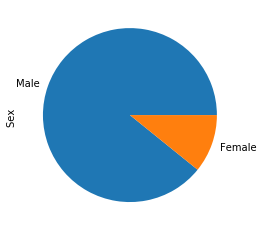

In [60]:
G_1 = F_M.plot.pie()
G_1

In [15]:
Male = S_Fatal.drop(S_Fatal[S_Fatal["Sex "] == "Female"].index)
Female = S_Fatal.drop(S_Fatal[S_Fatal["Sex "] == "Male"].index)
display(Male.head(),Female.head())

,Sex,Fatal (Y/N)
0,Male,No
1,Male,No
2,Male,No
3,Male,No
4,Male,No


,Sex,Fatal (Y/N)
7,Female,No
9,Female,No
30,Female,No
31,Female,No
34,Female,No


In [16]:
#La relacion que hay por sexo y la fatalidad
a = pd.crosstab(Male['Sex '], Male['Fatal (Y/N)']).apply(lambda r: r/r.sum(), axis=1)*100
b = pd.crosstab(Female['Sex '], Female['Fatal (Y/N)']).apply(lambda r: r/r.sum(), axis=1)*100
Rel = a.append(b)
Rel = Rel.transpose()

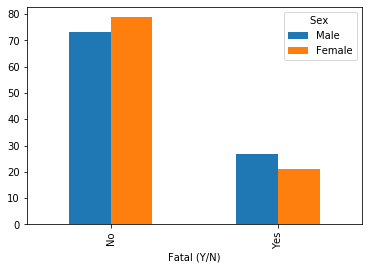

In [58]:
#Se puede apreciar que la hipótesis no se cumple, ya que los hombres sufren mas ataques letales que las mujeres
G_2 = Rel.plot.bar()
G_2

In [29]:
#Ahora podemos comparar la gravedad de las lesiones entre ambos sexos
Shark_in = Shark_5[["Sex ","Fatal (Y/N)","Injury"]]
Shark_in.head()

,Sex,Fatal (Y/N),Injury
0,Male,No,Minor injury to thigh
1,Male,No,Lacerations to hands
2,Male,No,Lacerations to lower leg
3,Male,No,Struck by fin on chest & leg
4,Male,No,No injury: Knocked off board by shark


In [33]:
# 2 tablas distintas por cada sexo con todos los supervivientes y la lesión
Shark_ma = Shark_in[(Shark_in["Sex "] == "Male") & (Shark_in["Fatal (Y/N)"] == "No")]
Shark_fe = Shark_in[(Shark_in["Sex "] == "Female") & (Shark_in["Fatal (Y/N)"] == "No")]
display(Shark_ma.head(),Shark_fe.head())

,Sex,Fatal (Y/N),Injury
0,Male,No,Minor injury to thigh
1,Male,No,Lacerations to hands
2,Male,No,Lacerations to lower leg
3,Male,No,Struck by fin on chest & leg
4,Male,No,No injury: Knocked off board by shark


,Sex,Fatal (Y/N),Injury
7,Female,No,Severe lacerations to shoulder & forearm
9,Female,No,Lacerations & punctures to lower right leg
30,Female,No,Minor injury to leg
31,Female,No,Minor injury to toes
34,Female,No,"5 tiny puncture marks to lower leg, treated wi..."


In [40]:
# Agrupación de los datos de la columna Injury en dos grupos, Grave y Minor

def severity_of_injuries (s):
    s = str(s)
    if (re.findall("[Ss]urvived|[Ll]acetat|[Ff]atal\w+", s)):
        return "Grave"
    elif (re.findall("[Mm]inor|scra|[Ff]ing|hand|tiny|[Bb]itt|[Aa]brasio|[Ii]njur\w+", s)):
        return "Minor"
    else:
        return "Grave"
    
    #def fatal_injuries (f)
   # elif (re.search("\W*([[FfAaTtAaLl])\W*",f)):
     #   return "Fatal"
Shark_ma["Injury"] = Shark_ma["Injury"].apply(severity_of_injuries)
Shark_fe["Injury"] = Shark_fe["Injury"].apply(severity_of_injuries)


/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [41]:
display(Shark_ma["Injury"].value_counts(),Shark_fe["Injury"].value_counts(),Shark_ma.head(),Shark_fe.head())

Minor    2069
Grave    1423
Name: Injury, dtype: int64

Minor    267
Grave    189
Name: Injury, dtype: int64

,Sex,Fatal (Y/N),Injury
0,Male,No,Minor
1,Male,No,Minor
2,Male,No,Grave
3,Male,No,Grave
4,Male,No,Minor


,Sex,Fatal (Y/N),Injury
7,Female,No,Grave
9,Female,No,Grave
30,Female,No,Minor
31,Female,No,Minor
34,Female,No,Minor


In [48]:
#Relación de Grave/Minor por cada sexo
c = pd.crosstab(Shark_ma["Sex "], Shark_ma['Injury']).apply(lambda r: r/r.sum(), axis=1)*100
b = pd.crosstab(Shark_fe['Sex '], Shark_fe['Injury']).apply(lambda r: r/r.sum(), axis=1)*100
Rel_2 = c.append(b)
G3 = Rel_2.transpose()
display(Rel_2)

Injury,Grave,Minor
Sex,,
Male,40.750286,59.249714
Female,41.447368,58.552632


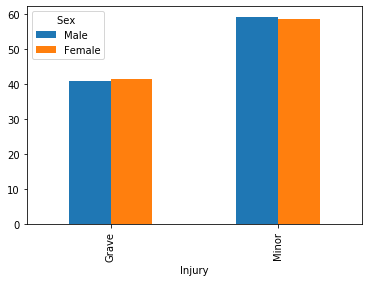

In [59]:
#En la siguiente gráfica se aprecia que en cuanto a la gravedad de las heridas, la diferencia es practicamente nula
G_3 = G3.plot.bar()
G_3